In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Loading the data
dataset = pd.read_csv("traindata.csv")

In [29]:
dataset.shape

(8523, 12)

In [30]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [32]:
# missing values in Item Weight and Outlet Size needs to be imputed
mean = dataset['Item_Weight'].mean() 
dataset['Item_Weight'].fillna(mean, inplace = True)

In [33]:
# treating missing calues of Outlet size
mode = dataset['Outlet_Size'].mode()
dataset['Outlet_Size'].fillna(mode[0], inplace=True)

In [34]:
# droping id columns
dataset.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)

In [35]:
# Dealing with categorical data
dataset = pd.get_dummies(dataset)

In [36]:
# observing the dataset again
dataset.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [37]:
# creating train and test data
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.3)

X_train = train.drop('Item_Outlet_Sales',axis=1)
y_train = train['Item_Outlet_Sales']

X_test = test.drop('Item_Outlet_Sales',axis=1)
y_test = test['Item_Outlet_Sales']

In [38]:
# Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [42]:
# Error rate of K values
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1578.9992674257117
RMSE value for k=  2 is: 1358.3110216439013
RMSE value for k=  3 is: 1287.888909402165
RMSE value for k=  4 is: 1254.485728468131
RMSE value for k=  5 is: 1228.6442599010552
RMSE value for k=  6 is: 1211.8367578064026
RMSE value for k=  7 is: 1208.1164090474513
RMSE value for k=  8 is: 1209.5072275614818
RMSE value for k=  9 is: 1212.8616259398198
RMSE value for k=  10 is: 1219.688882966505
RMSE value for k=  11 is: 1223.1425004040827
RMSE value for k=  12 is: 1225.4181180546202
RMSE value for k=  13 is: 1230.1573627370049
RMSE value for k=  14 is: 1237.5898518468227
RMSE value for k=  15 is: 1243.3601269278934
RMSE value for k=  16 is: 1248.399557373979
RMSE value for k=  17 is: 1257.7930010935393
RMSE value for k=  18 is: 1261.9106285536357
RMSE value for k=  19 is: 1267.4483703899778
RMSE value for k=  20 is: 1274.5521571884053


<AxesSubplot:>

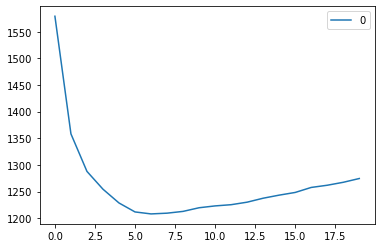

In [43]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [45]:
# Implementing GridSearchCV
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [46]:
# Training the model
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=9, metric="minkowski",p=2)
model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [47]:
# Prediction of test data
y_pred = model.predict(X_test)

In [48]:
# Evaluating
MSE = mean_squared_error(y_test,y_pred)
print("Mean Squared Error is : ",MSE)

Mean Squared Error is :  1471033.3236773834
